# Des premiers modèles simplistes

On s'intéresse à calculer le nombre de bouteilles économisées dans un système de consigne des bouteilles. On considère pour cela une organisation quelconque vendant du champagne en bouteille.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import(MultipleLocator, AutoMinorLocator)
from math import floor, ceil, sqrt

#### Premier modèle : taux de rejet constant

On fait les hypothèses suivantes pour ce premier scénario de la consigne :

- Nombre de bouteilles considérées : $N = 20000000$
- Nombre d'années pour l'expérience : $a = 30$
- On réalise des calculs pour différents taux de rejets : $r_0 = 0.10$, $r_1 = 0.15$, $r_2 = 0.20$

**Définition** : le *taux de rejet* correspond à la probabilité qu'une bouteille, au moment de la récupération, ne satisfasse pas les conditions nécessaires à sa réutilisation pour un nouveau cycle. 
Dans ce premier modèle très simpliste, on n'impose pas un nombre maximal de réutilisations des bouteilles.  
Un calcul probabiliste donne, étant donné un taux de rejet fixe $r$, le nombre moyen de réutilisations d'une bouteille. En notant $X$ la variable aléatoire entière donnant le nombre de réutilisations moyens d'une bouteille, on a 
$$\mathbb{E}(X) = \sum_{k=1}^{\infty}k(1-r)^kr = (1-r)r\sum_{k=0}^{\infty}(k+1)(1-r)^k = \frac{1-r}{r} = \frac{1}{r}-1$$

Pour $r_0$, cela représente $9$ réutilisations en moyenne, pour $r_2$ cela représente $4$ réutilisations.
En pratique, pour nos taux de rejet, il n'y a pas véritablement besoin de prendre en compte une limite de 20 réutilisations, car la probabilité qu'une bouteille soit réutilisée plus de 20 fois est $(1-r)^{20} << 1$.

Ce sont des taux de rejet pessimistes (i.e grands) lorsque l'on compare à d'autres industries (bières, jus), mais les contraintes subies par une bouteille de champagne sont beaucoup plus importantes.

Dans ce scénario, en notant $v_i$ le nombre de nouvelles bouteilles qui doivent être produites à l'année $i$, on a 
$$v_0 = N, \quad v_1 = N, \quad \forall i \geq 2, v_i = Nr$$

In [2]:
# Nombre de bouteilles considérées
N = 2000000

annees = 30

years = [i for i in range(annees)] 
# Taux de rejet
r0, r1, r2 = 0.1, 0.15, 0.2

# Probabilité que la bouteille soit réutilisée plus de n fois, en fonction du taux de rejet considéré r
def p(r,n):
    return (1-r)**n


In [3]:
# Tableaux du nombre de bouteilles par année pour le premier modèle, pour les différents taux de rejet

def new_bot(r):
    v = [0 for i in range(annees)]
    v[0] = N
    v[1] = N
    for i in range(2,annees):
        v[i] = N*r
    return v

print(new_bot(r0))
print(new_bot(r1))
print(new_bot(r2))


[2000000, 2000000, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0, 200000.0]
[2000000, 2000000, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0, 300000.0]
[2000000, 2000000, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0, 400000.0]


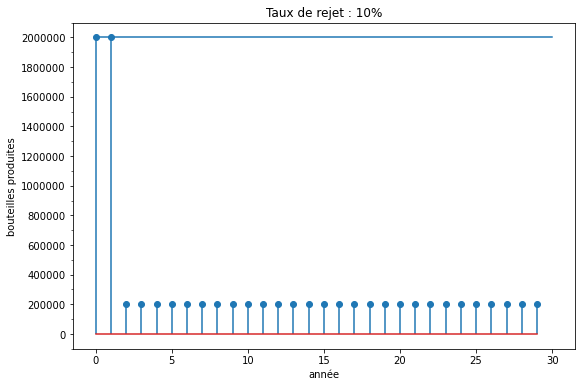

In [13]:
#fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols =3, figsize = (24,7))
fig, ax0 = plt.subplots(figsize=(9,6))

# formattage de la représentation graphique
def my_plotter(ax, v, title = None):
    ax.stem(years,v)
    ax.plot([0,30], [2000000, 2000000])
    ax.set_xlabel("année")
    ax.set_ylabel("bouteilles produites")
    ax.set_title(title)
    ax.yaxis.set_major_locator(MultipleLocator(200000))
    ax.yaxis.set_major_formatter('{x:.0f}')
    ax.yaxis.set_minor_locator(MultipleLocator(100000))

my_plotter(ax0, new_bot(r0), "Taux de rejet : 10%")
#my_plotter(ax1, new_bot(r1), "Taux de rejet : 15%")
#my_plotter(ax2, new_bot(r2), "Taux de rejet : 20%")

plt.show()

Ces modèles, quoique très simplistes, donnent une idée globale de l'économie qui peut être réalisée sur le long terme (avec des bouteilles qui seraient extrêmement résistantes et réutilisables à l'infini). En effet, même dans le cas pessimiste d'un taux de rejet de 20%, on réalise une économie de prodcution de **80%** des bouteilles par rapport au fonctionnement actuel, ce qui représente, dans l'hypothèse raisonnable que la production d'une nouvelle bouteille coûte 500gCO2e, une économie de **2400tCO2e** sur 30 ans.

#### Deuxième modèle : taux de rejet évolutif

On fait les hypothèses suivantes pour ce second scénario de consigne :
- Nombre de bouteilles considérées : $N = 2 000 000$  
- Nombre d'années de l'expérience : $a = 30$
- Cycle de 2 ans : il s'écoule 2 ans entre 2 embouteillages de la même bouteille (du fait de la fermentation en bouteille du champagne)
- Taux de rejet évolutif, afin de traduire l'usure de la bouteille au fur et à mesure des réalisations. On a fait 3 modèles d'évolution. On suppose d'abord qu'il évolue linéairement avec le nombre de réutilisations. Si la bouteille a déjà été réutilisée $l$ fois, alors la probabilité qu'elle soit rejetée à la récupération est de $r_{evo, 1}(l)=\min(0.10 + 0.05l ; 1)$. En particulier, une bouteille déjà réutilisée 18 fois sera nécessairement jetée (car $r(18)=1$). On fait un deuxième modèle avec une évolution dépedant de la racine carrée du nombre de réutilisations (le taux de rejet croît rapidement au cours des premières réutilisations) : $r_{evo, 2}(l) = \min(0.10 + 0.20\sqrt{l} ; 1)$. Enfin, on fait un troisième modèle avec une évolution dépendant du carré du nombre de réutilisations (le taux de rejet croît lentement au cours des premières réutilisations) : $r_{evo, 3}(l) = \min(0.10 + 0.00225l^2 ; 1)$. 

Cette fois-ci, l'expression du nombre de nouvelles bouteilles devant être produites est moins évident, mais il est exprimable littéralement avec une formule de récurrence.  
Étant donnée l'hypothèse du cycle de 2 ans, on s'intéresse à calculer le nombre de bouteilles produites aux années paires : on calcule $v_{2n}$ pour $n$ entier positif.  
On a $v_0 = N$, puis, pour $n \geq 1$, on a $v_{2n+1} = v_{2n}$ et :
$$v_{2n}= \sum_{k=0}^{n-1}\left(v_{2k}\left[\prod_{l=0}^{n-k-2}(1-r(l))\right] r(n-k-1) \right)$$


In [5]:
#Nombre de bouteilles considérées
N = 2000000

annees = 30

years = [i for i in range(annees)] 

#probabilité de rejet en fonction du nombre de réutilisations de la bouteille
#différentes formules
def r_evo1(n):
    return min(0.1 + n * 0.05, 1)

def r_evo2(n):
    return min(0.1 + sqrt(n)*0.2, 1)

def r_evo3(n):
    return min(0.1 + 0.00225*n*n, 1)

#tableau des valeurs du nombre de nouvelles bouteilles qui doivent être produites chaque année
def calcul_bouteilles(r):      
    v = [0 for i in range(annees)]
    v[0] = N
    v[1] = N
    v[2] = N*r(0)
    v[3] = N*r(0)
    for i in range(2, annees//2):
        sum0 = 0
        for k in range(0,i):
            pdt = 1
            for l in range(0,i-k-1):
                pdt = pdt * (1- r(l))
            sum0 = sum0 + v[2*k] * pdt * r(i-k-1)
        v[2*i] = ceil(sum0)
        v[2*i + 1] = ceil(sum0)

    return v

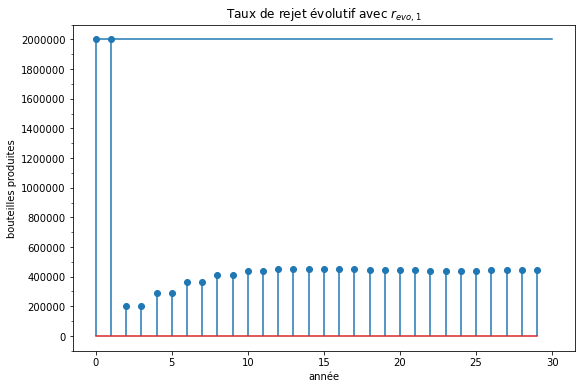

[2000000, 2000000, 200000.0, 200000.0, 290001, 290001, 362001, 362001, 411951, 411951, 440436, 440436, 451864, 451864, 452561, 452561, 448617, 448617, 444337, 444337, 441739, 441739, 441009, 441009, 441407, 441407, 442098, 442098, 442584, 442584]


In [6]:
fig, ax = plt.subplots(figsize = (9,6))

# formattage de la représentation graphique
# pour afficher la courbe en fonction du taux de rejet, il faut modifier l'argument passé à la fonction calcul_bouteilles ci-dessous
v = calcul_bouteilles(r_evo1)
my_plotter(ax,v,r"Taux de rejet évolutif avec $r_{evo,1}$")

plt.show()
print(v)

On atteint un nombre de nouvelles bouteilles produites stable au bout d'une dizaine d'années.  
On voit que le nombre de bouteilles qui doivent être produites par an diminue de près de **78%** une fois le dispositif bien lancé (440 000 bouteilles contre 2 000 000 sans la consigne), ce qui représente, sur 30 ans, **46,8 millions** de bouteilles qui ne doivent pas être produites.  
En partant de l'hypothèse optimiste que l'empreinte carbone d'une bouteille est de 500 gCO2e, on évite l'émission de **2340 tCO2e**.

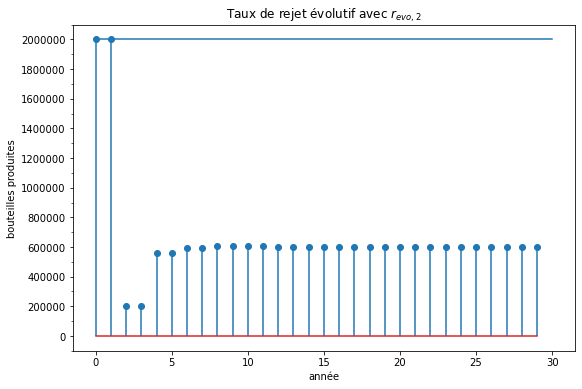

[2000000, 2000000, 200000.0, 200000.0, 560001, 560001, 592382, 592382, 605814, 605814, 605547, 605547, 603507, 603507, 602321, 602321, 602008, 602008, 602055, 602055, 602143, 602143, 602184, 602184, 602190, 602190, 602185, 602185, 602182, 602182]


In [7]:
fig, ax = plt.subplots(figsize = (9,6))

# formattage de la représentation graphique
# pour afficher la courbe en fonction du taux de rejet, il faut modifier l'argument passé à la fonction calcul_bouteilles ci-dessous
v = calcul_bouteilles(r_evo2)
my_plotter(ax,v,r"Taux de rejet évolutif avec $r_{evo,2}$")

plt.show()
print(v)

On atteint un nombre de nouvelles bouteilles produites stable au bout de 6-7 années.  
On voit que le nombre de bouteilles qui doivent être produites par an diminue de près de **70%** une fois le dispositif bien lancé (600 000 bouteilles environ contre 2 000 000 sans la consigne), ce qui représente, sur 30 ans, **42 millions** de bouteilles qui ne doivent pas être produites.  
En partant de l'hypothèse optimiste que l'empreinte carbone d'une bouteille est de 500 gCO2e, on évite l'émission de **2100 tCO2e**.

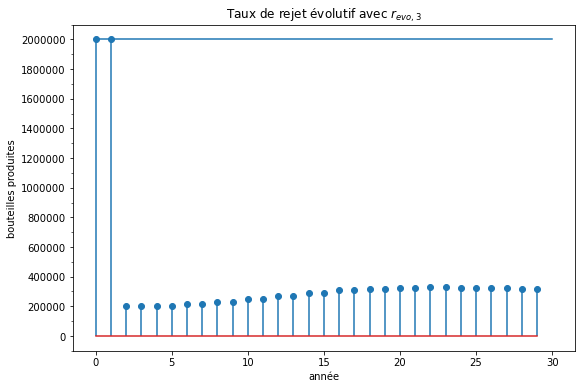

[2000000, 2000000, 200000.0, 200000.0, 204050, 204050, 214949, 214949, 231024, 231024, 250436, 250436, 271127, 271127, 290926, 290926, 307779, 307779, 320071, 320071, 326951, 326951, 328543, 328543, 325941, 325941, 320930, 320930, 315486, 315486]


In [8]:
fig, ax = plt.subplots(figsize = (9,6))

# formattage de la représentation graphique
# pour afficher la courbe en fonction du taux de rejet, il faut modifier l'argument passé à la fonction calcul_bouteilles ci-dessous
v = calcul_bouteilles(r_evo3)
my_plotter(ax,v,r"Taux de rejet évolutif avec $r_{evo,3}$")

plt.show()
print(v)

On atteint un nombre de nouvelles bouteilles produites stable au bout d'une vingtaine d'années.  
On voit que le nombre de bouteilles qui doivent être produites par an diminue de près de **84%** une fois le dispositif bien lancé (320 000 bouteilles contre 2 000 000 sans la consigne), ce qui représente, sur 30 ans, **50,4 millions** de bouteilles qui ne doivent pas être produites.  
En partant de l'hypothèse optimiste que l'empreinte carbone d'une bouteille est de 500 gCO2e, on évite l'émission de **2520 tCO2e**.

# Un modèle plus réaliste

Les modèles considérés jusque là partent d'une hypothèse simpliste et peu réaliste : en deux années, l'entreprise serait capable de prendre en compte dans un système de consigne la totalité des 2 millions de bouteilles sortant du fabricant à destination des bars / hôtels / restaurants.  
Cette hypothèse est très optimiste, il faut plutôt s'attendre à ce que la fraction des 2 millions de bouteilles rentrant dans le système de consigne augmente d'année en année, jusqu'à atteindre l'intégralité du volume sortant en une dizaine d'années.  

On appelle alors $F(a)$ cette fraction en fonction du nombre d'années $a$ depuis le début de la mise en place du système de consigne chez le fabricant. En partant du principe que $F(10) = 1$ et $F(0) = 0$ et en faisant une hypothèse d'une croissance linéaire de ce taux, on a $F(a) = \min(1, a/10)$ (le taux est rapporté à l'unité, i.e $1$ signifie 100%).  

On a alors une nouvelle expression pour le nombre de nouvelles bouteilles devant être produites $v_n$ :
- $v_0 = v_1 = N$
- Pour $2n$, on a 
$$
v_{2n}= F(2n)\sum_{k=0}^{n-1}\left(v_{2k}\left[\prod_{l=0}^{n-k-2}(1-r(l))F(2(k+l+1))\right] r(n-k-1) \right) + (1-F(2n))N
$$
- Pour $2n + 1$, il s'agit de la même expression en remplaçant $2n$ par $2n+1$ et les $v_{2k}$ par $v_{2k+1}$
$$
v_{2n+1}= F(2n+1)\sum_{k=0}^{n-1}\left(v_{2k+1}\left[\prod_{l=0}^{n-k-2}(1-r(l))F(2(k+l+1)+1)\right] r(n-k-1) \right) + (1-F(2n+1))N
$$

In [9]:
# fonction calculant la fraction de bouteilles prises en compte dans le circuit de consigne
annees = 30
def F(a):
    return min(1, a/10)

def calcul_bouteilles2(r):      
    v = [0 for i in range(annees)]
    v[0] = N
    v[1] = N
    for i in range(1, annees//2):
        sum0 = 0
        sum1 = 0
        for k in range(0,i):
            pdt0 = 1
            pdt1 = 1
            for l in range(0,i-k-1):
                pdt0 = pdt0 * (1- r(l))*F(2*(k+l+1))
                pdt1 = pdt1 * (1- r(l))*F(2*(k+l+1)+1)
            sum0 = sum0 + v[2*k] * pdt0 * r(i-k-1)
            sum1 = sum1 + v[2*k + 1] * pdt1 * r(i-k-1)
        v[2*i] = ceil(sum0*F(2*i) + (1-F(2*i))*N )
        v[2*i + 1] = ceil(sum1*F(2*i + 1) + (1-F(2*i + 1))*N)

    return v

def bouteilles_economisees(r):
    s = 0
    v = calcul_bouteilles2(r)
    for i in range(annees):
        s += N - v[i]
    print("Sur les 30 premières années, on économise", s, "bouteilles !")

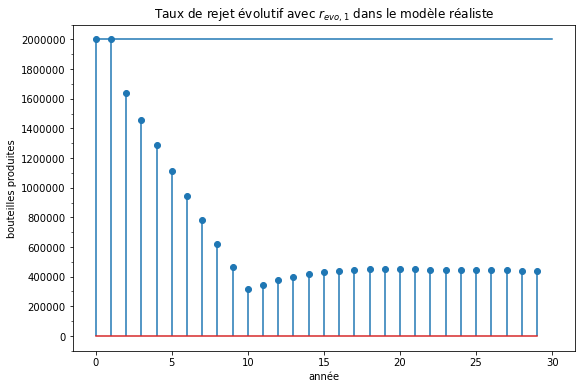

[2000000, 2000000, 1640000, 1460000, 1287200, 1113500, 945056, 779061, 618943, 464101, 317245, 344787, 377485, 396322, 417855, 428567, 440207, 444634, 448991, 449513, 449607, 448413, 446825, 445428, 443821, 442936, 442011, 441730, 441498, 441596]
Sur les 30 premières années, on économise 39182668 bouteilles !


In [10]:
fig, ax = plt.subplots(figsize = (9,6))

# formattage de la représentation graphique
# pour afficher la courbe en fonction du taux de rejet, il faut modifier l'argument passé à la fonction calcul_bouteilles ci-dessous
v = calcul_bouteilles2(r_evo1)
my_plotter(ax,v,r"Taux de rejet évolutif avec $r_{evo,1}$ dans le modèle réaliste")

plt.show()
print(v)
bouteilles_economisees(r_evo1)

On atteint un nombre de nouvelles bouteilles produites stable au bout d'une vingtaine d'années.  
On voit que le nombre de bouteilles qui doivent être produites par an diminue de près de **78%** une fois le dispositif bien lancé.
Sur les 30 premières années, on évite la production de **39,2 millions** de bouteilles.
En partant de l'hypothèse optimiste que l'empreinte carbone d'une bouteille est de 500 gCO2e, on évite l'émission de **1960 tCO2e**.

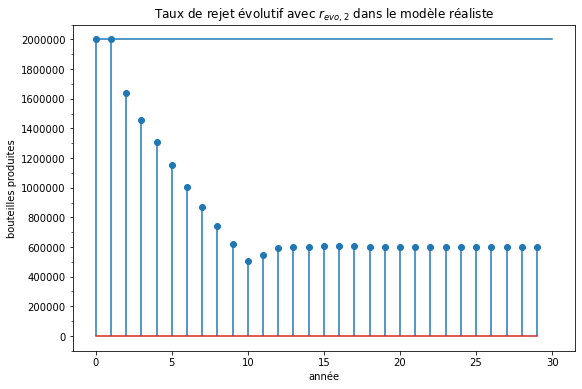

[2000000, 2000000, 1640000, 1460000, 1308800, 1154000, 1007955, 869401, 739534, 618270, 506113, 548607, 592224, 597329, 602563, 603548, 604382, 603885, 603288, 602870, 602421, 602266, 602112, 602101, 602097, 602119, 602147, 602162, 602178, 602182]
Sur les 30 premières années, on économise 35315446 bouteilles !


In [11]:
fig, ax = plt.subplots(figsize = (9,6))

# formattage de la représentation graphique
# pour afficher la courbe en fonction du taux de rejet, il faut modifier l'argument passé à la fonction calcul_bouteilles ci-dessous
v = calcul_bouteilles2(r_evo2)
my_plotter(ax,v,r"Taux de rejet évolutif avec $r_{evo,2}$ dans le modèle réaliste")

plt.show()
print(v)
bouteilles_economisees(r_evo2)

On atteint un nombre de nouvelles bouteilles produites stable au bout d'une quinzaine d'années.  
On voit que le nombre de bouteilles qui doivent être produites par an diminue de près de **70%** une fois le dispositif bien lancé.
Sur les 30 premières années, on évite la production de **35,3 millions** de bouteilles.
En partant de l'hypothèse optimiste que l'empreinte carbone d'une bouteille est de 500 gCO2e, on évite l'émission de **1760 tCO2e**.

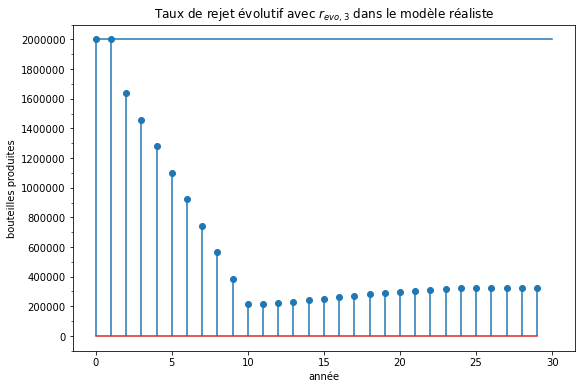

[2000000, 2000000, 1640000, 1460000, 1280324, 1100608, 921496, 742562, 564654, 387504, 212304, 217410, 225007, 232057, 241860, 250035, 260934, 269359, 280200, 288001, 297680, 304085, 311691, 316155, 321121, 323432, 325647, 325973, 325805, 324652]
Sur les 30 premières années, on économise 42249444 bouteilles !


In [12]:
fig, ax = plt.subplots(figsize = (9,6))

# formattage de la représentation graphique
# pour afficher la courbe en fonction du taux de rejet, il faut modifier l'argument passé à la fonction calcul_bouteilles ci-dessous
v = calcul_bouteilles2(r_evo3)
my_plotter(ax,v,r"Taux de rejet évolutif avec $r_{evo,3}$ dans le modèle réaliste")

plt.show()
print(v)
bouteilles_economisees(r_evo3)

On atteint un nombre de nouvelles bouteilles produites stable au bout d'une vingtaine d'années.  
On voit que le nombre de bouteilles qui doivent être produites par an diminue de près de **84%** une fois le dispositif bien lancé.
Sur les 30 premières années, on évite la production de **42,2 millions** de bouteilles.
En partant de l'hypothèse optimiste que l'empreinte carbone d'une bouteille est de 500 gCO2e, on évite l'émission de **2110 tCO2e**.